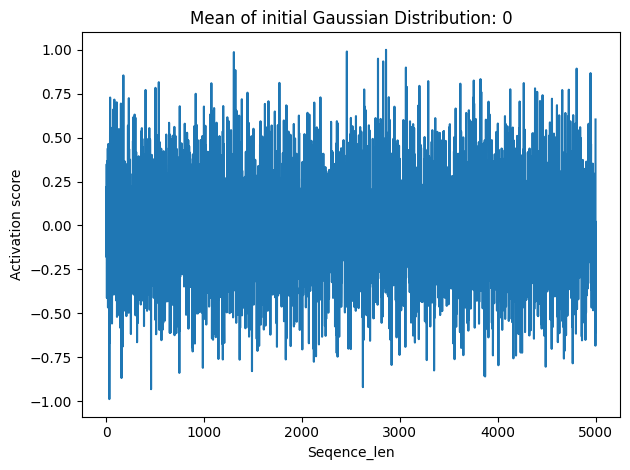

In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt

device = 'cuda'
seq_len = 5000
output_dim = 768
frequency = 10000
batch_size = 1

position_ids = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(-1)
indices = torch.arange(0, output_dim // 2, dtype=torch.float)
indices = torch.pow(frequency, -2 * indices / output_dim)
embeddings = position_ids * indices

embeddings = torch.stack([torch.sin(embeddings), torch.cos(embeddings)], dim=-1)
embeddings = embeddings.repeat((batch_size, *([1]*len(embeddings.shape))))
embeddings = torch.reshape(embeddings, (batch_size, seq_len, output_dim))
embeddings = embeddings.to(device)

pos_emb = embeddings
cos_pos = pos_emb[..., 1::2].repeat_interleave(2, dim=-1)
sin_pos = pos_emb[..., ::2].repeat_interleave(2, dim=-1)

mean = 0

# initilize the q k with Gaussian distribution
torch.manual_seed(333)
q = torch.normal(mean=0, std=1.0, size=(1, seq_len, output_dim)).to(device)
k = torch.normal(mean=0, std=1.0, size=(1, seq_len, output_dim)).to(device)

q2 = torch.stack([-q[..., 1::2], q[...,::2]], -1)
q2 = q2.reshape(q.shape)
k2 = torch.stack([-k[..., 1::2], k[...,::2]], -1)
k2 = k2.reshape(k.shape)

q_rope = q * cos_pos + q2 * sin_pos
k_rope = k * cos_pos + k2 * sin_pos

Activation_score_original = torch.einsum('bmd,bnd->bmn', q, k)
Activation_score_rope = torch.einsum('bmd,bnd->bmn', q_rope, k_rope)

score_decay = torch.flip(Activation_score_rope[0][-1]/torch.max(Activation_score_rope[0][-1]), dims=[0]).cpu().numpy()

plt.plot(score_decay)
plt.title('Activation Decay Test')
plt.xlabel('Seqence_len')
plt.ylabel('Activation score')
plt.title(f'Mean of initial Gaussian Distribution: {mean}')
plt.tight_layout()
plt.show()

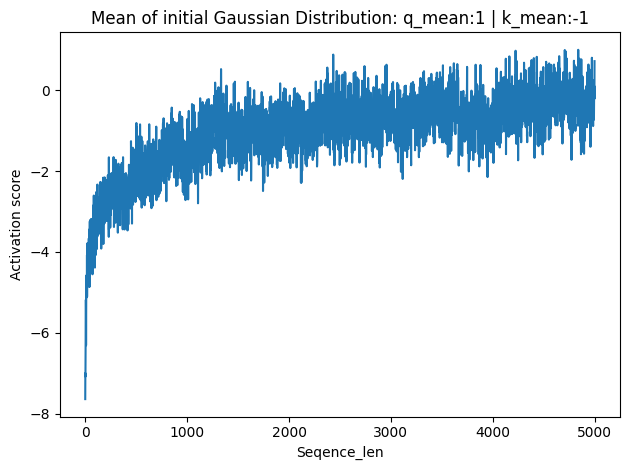

In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt

device = 'cuda'
seq_len = 5000
output_dim = 768
frequency = 10000
batch_size = 1

position_ids = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(-1)
indices = torch.arange(0, output_dim // 2, dtype=torch.float)
indices = torch.pow(frequency, -2 * indices / output_dim)
embeddings = position_ids * indices

embeddings = torch.stack([torch.sin(embeddings), torch.cos(embeddings)], dim=-1)
embeddings = embeddings.repeat((batch_size, *([1]*len(embeddings.shape))))
embeddings = torch.reshape(embeddings, (batch_size, seq_len, output_dim))
embeddings = embeddings.to(device)

pos_emb = embeddings
cos_pos = pos_emb[..., 1::2].repeat_interleave(2, dim=-1)
sin_pos = pos_emb[..., ::2].repeat_interleave(2, dim=-1)


# initilize the q k with Gaussian distribution
torch.manual_seed(333)
q = torch.normal(mean=1, std=1.0, size=(1, seq_len, output_dim)).to(device)
k = torch.normal(mean=-1, std=1.0, size=(1, seq_len, output_dim)).to(device)

q2 = torch.stack([-q[..., 1::2], q[...,::2]], -1)
q2 = q2.reshape(q.shape)
k2 = torch.stack([-k[..., 1::2], k[...,::2]], -1)
k2 = k2.reshape(k.shape)

q_rope = q * cos_pos + q2 * sin_pos
k_rope = k * cos_pos + k2 * sin_pos

Activation_score_original = torch.einsum('bmd,bnd->bmn', q, k)
Activation_score_rope = torch.einsum('bmd,bnd->bmn', q_rope, k_rope)

score_decay = torch.flip(Activation_score_rope[0][-1]/torch.max(Activation_score_rope[0][-1]), dims=[0]).cpu().numpy()

plt.plot(score_decay)
plt.title('Activation Decay Test')
plt.xlabel('Seqence_len')
plt.ylabel('Activation score')
plt.title(f'Mean of initial Gaussian Distribution: q_mean:1 | k_mean:-1')
plt.tight_layout()
plt.show()

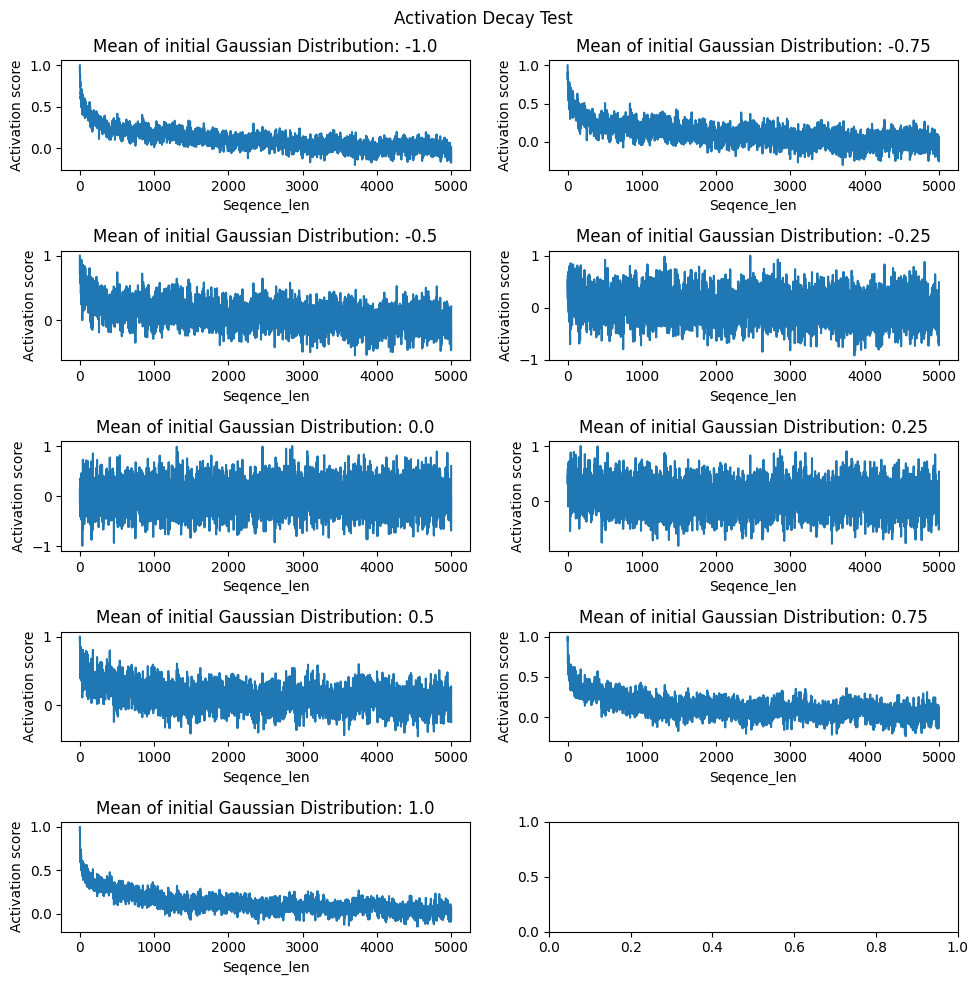

In [22]:
means = list(np.arange(-1, 1.25, 0.25))  # Different mean values for Gaussian distribution
num_subplots = len(means)
num_cols = 2
num_rows = (num_subplots + 1) // 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))  # Adjust the figsize as needed
fig.suptitle('Activation Decay Test')

for i, mean_val in enumerate(means):
  # initilize the q k with Gaussian distribution
  torch.manual_seed(333)
  q = torch.normal(mean=mean_val, std=1.0, size=(1, seq_len, output_dim)).to(device)
  k = torch.normal(mean=mean_val, std=1.0, size=(1, seq_len, output_dim)).to(device)

  q2 = torch.stack([-q[..., 1::2], q[...,::2]], -1)
  q2 = q2.reshape(q.shape)
  k2 = torch.stack([-k[..., 1::2], k[...,::2]], -1)
  k2 = k2.reshape(k.shape)

  q_rope = q * cos_pos + q2 * sin_pos
  k_rope = k * cos_pos + k2 * sin_pos

  Activation_score_original = torch.einsum('bmd,bnd->bmn', q, k)
  Activation_score_rope = torch.einsum('bmd,bnd->bmn', q_rope, k_rope)

  score_decay = torch.flip(Activation_score_rope[0][-1]/torch.max(Activation_score_rope[0][-1]) , dims=[0]).cpu().numpy()

  row_idx = i // num_cols
  col_idx = i % num_cols
  axes[row_idx, col_idx].plot(score_decay)
  axes[row_idx, col_idx].set_xlabel('Seqence_len')
  axes[row_idx, col_idx].set_ylabel('Activation score')
  axes[row_idx, col_idx].set_title(f'Mean of initial Gaussian Distribution: {mean_val}')

plt.tight_layout()
plt.show()

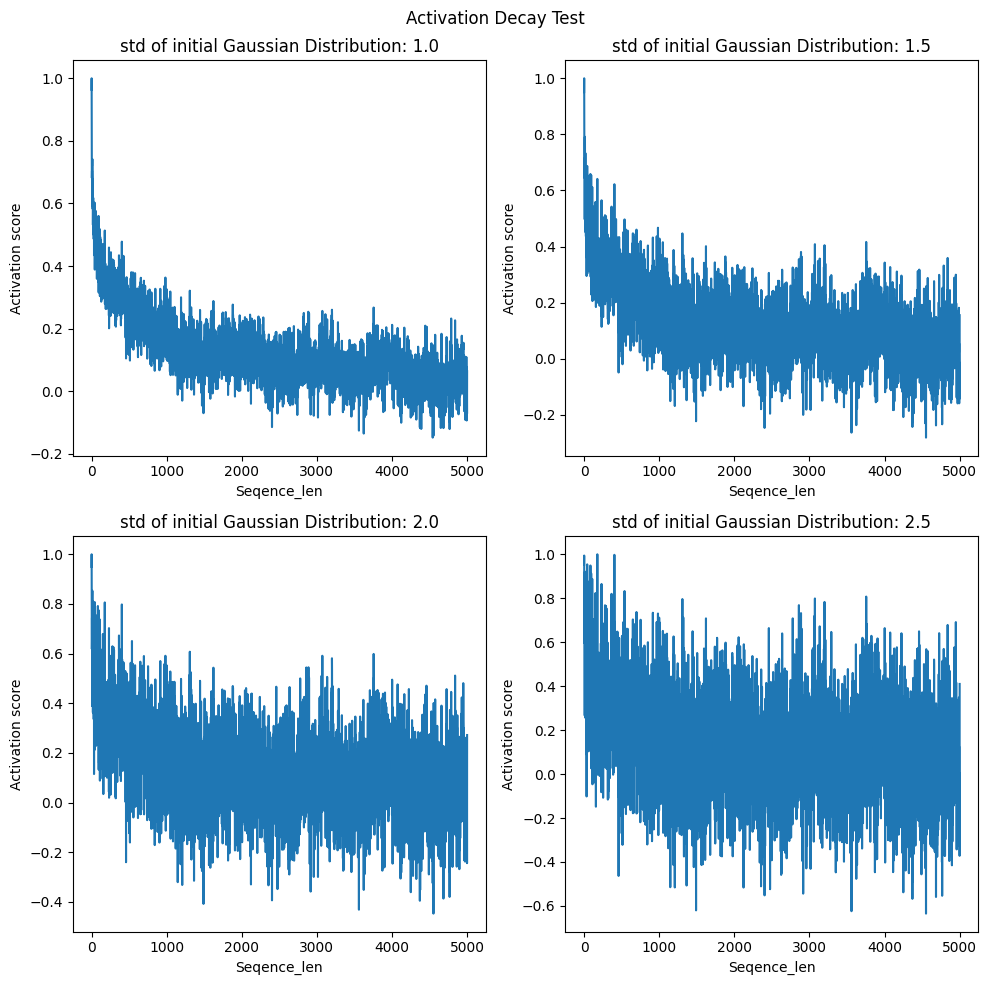

In [23]:
stds = list(np.arange(1, 3, 0.5))  # Different mean values for Gaussian distribution
num_subplots = len(stds)
num_cols = 2
num_rows = (num_subplots + 1) // 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))  # Adjust the figsize as needed
fig.suptitle('Activation Decay Test')

for i, std_val in enumerate(stds):
  # initilize the q k with Gaussian distribution
  torch.manual_seed(333)
  q = torch.normal(mean=1, std=std_val, size=(1, seq_len, output_dim)).to(device)
  k = torch.normal(mean=1, std=std_val, size=(1, seq_len, output_dim)).to(device)

  q2 = torch.stack([-q[..., 1::2], q[...,::2]], -1)
  q2 = q2.reshape(q.shape)
  k2 = torch.stack([-k[..., 1::2], k[...,::2]], -1)
  k2 = k2.reshape(k.shape)

  q_rope = q * cos_pos + q2 * sin_pos
  k_rope = k * cos_pos + k2 * sin_pos

  Activation_score_original = torch.einsum('bmd,bnd->bmn', q, k)
  Activation_score_rope = torch.einsum('bmd,bnd->bmn', q_rope, k_rope)

  score_decay = torch.flip(Activation_score_rope[0][-1]/torch.max(Activation_score_rope[0][-1]) , dims=[0]).cpu().numpy()

  row_idx = i // num_cols
  col_idx = i % num_cols
  axes[row_idx, col_idx].plot(score_decay)
  axes[row_idx, col_idx].set_xlabel('Seqence_len')
  axes[row_idx, col_idx].set_ylabel('Activation score')
  axes[row_idx, col_idx].set_title(f'std of initial Gaussian Distribution: {std_val}')

plt.tight_layout()
plt.show()

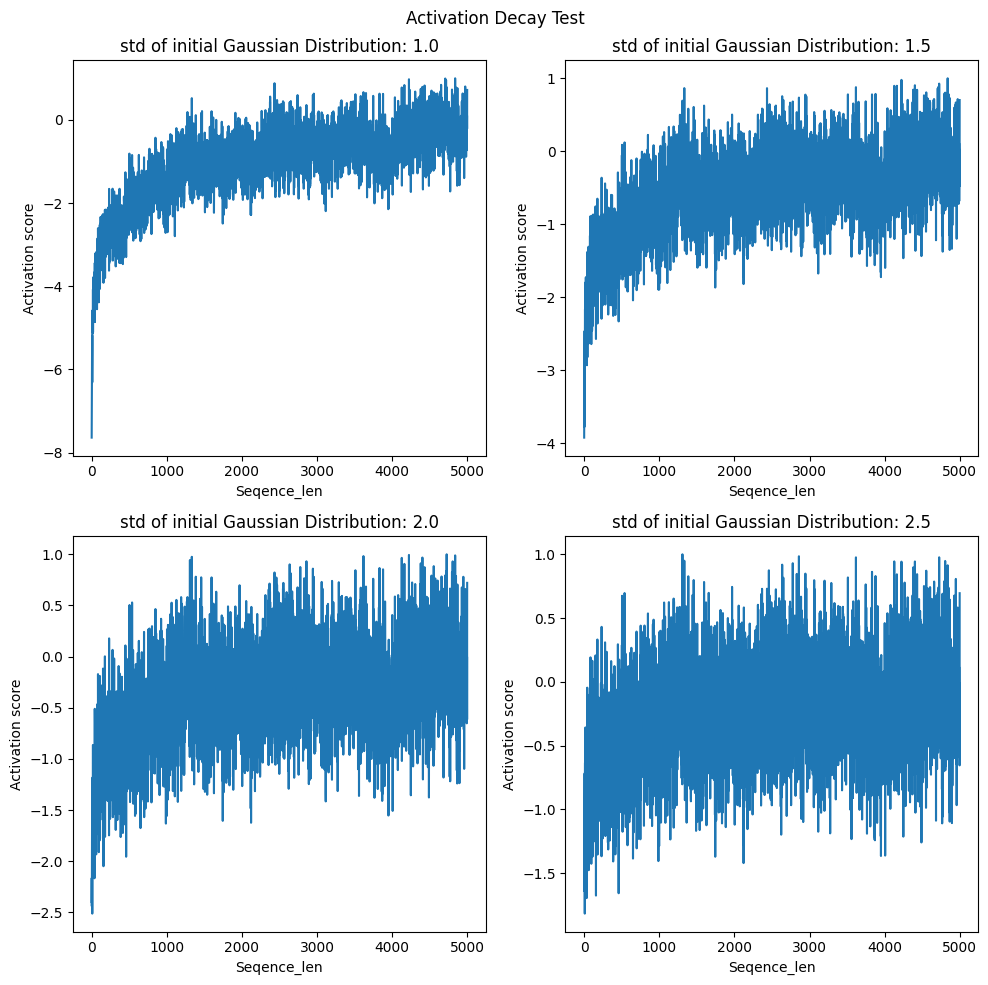

In [24]:
stds = list(np.arange(1, 3, 0.5))  # Different mean values for Gaussian distribution
num_subplots = len(stds)
num_cols = 2
num_rows = (num_subplots + 1) // 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))  # Adjust the figsize as needed
fig.suptitle('Activation Decay Test')

for i, std_val in enumerate(stds):
  # initilize the q k with Gaussian distribution
  torch.manual_seed(333)
  q = torch.normal(mean=1, std=std_val, size=(1, seq_len, output_dim)).to(device)
  k = torch.normal(mean=-1, std=std_val, size=(1, seq_len, output_dim)).to(device)

  q2 = torch.stack([-q[..., 1::2], q[...,::2]], -1)
  q2 = q2.reshape(q.shape)
  k2 = torch.stack([-k[..., 1::2], k[...,::2]], -1)
  k2 = k2.reshape(k.shape)

  q_rope = q * cos_pos + q2 * sin_pos
  k_rope = k * cos_pos + k2 * sin_pos

  Activation_score_original = torch.einsum('bmd,bnd->bmn', q, k)
  Activation_score_rope = torch.einsum('bmd,bnd->bmn', q_rope, k_rope)

  score_decay = torch.flip(Activation_score_rope[0][-1]/torch.max(Activation_score_rope[0][-1]) , dims=[0]).cpu().numpy()

  row_idx = i // num_cols
  col_idx = i % num_cols
  axes[row_idx, col_idx].plot(score_decay)
  axes[row_idx, col_idx].set_xlabel('Seqence_len')
  axes[row_idx, col_idx].set_ylabel('Activation score')
  axes[row_idx, col_idx].set_title(f'std of initial Gaussian Distribution: {std_val}')

plt.tight_layout()
plt.show()

## 总结与猜想
ROPE位置编码模式下，注意力远程衰减的性质与q、k的分布息息相关。当我们假定q、k分布服从高斯分布的前提下，具体表现为：
- 1）q、k均值同向（都大于0，或者都小于0）时，均值绝对值越大，注意力远程衰减性质越明显；
- 2）q、k均值异向（一个大于0，一个小于0）时，甚至出现注意力远程增加的性质；
- 3）q、k方差越大，注意力远程衰减性质越弱，越小时，注意力远程衰减性质越好；

因为经过训练后，不同层下不同注意力头生成的q、k分布各异，所以赋予了不同层、不同注意力头下具备各异的注意力远程衰减力度（有些关注局部、有些关注整体），甚至个别呈现出注意力远程增加（比如长上下文的插针测试）

因为q、k的分布与注意力远程衰减的关系，所以
、
 初始化方案中，设置bias选项默认为True更好，初始化的方差不能太大


 **不足**：

- 本文只能给出实验性的结论，暂未给出ROPE下注意力远程衰减与q、k的分布关系的理论性的推导证明；本文抛砖引玉，期待看到社区大佬们进一步的深入研究。



## Summary and conjecture
The property of remote attention decay in ROPE position encoding mode is closely related to the distribution of q and k. When we assume that the q and k distributions follow a Gaussian distribution, the specific manifestation is:
- When the mean values of q and k are in the same direction (both greater than 0 or both less than 0), the larger the absolute value of the mean, the more obvious the remote decay property of attention;
- When the mean values of q and k are opposite (one greater than 0 and one less than 0), there may even be a property of remote increase in attention;
- The larger the variance of q and k, the weaker the long-range decay property of attention, and the smaller the variance, the better the long-range decay property of attention;

Because after training, the distribution of q and k generated by different attention heads in different layers varies, different layers and attention heads are endowed with different levels of remote attenuation of attention (some focus on local areas, some focus on the whole), and some even show an increase in attention distance (such as long context pin testing)

Due to the relationship between the distribution of q and k and the remote decay of attention, it is better to set the bias option to True by default in the qw and kw initialization schemes, and the initialized variance should not be too large


**Shortcoming * *:

-This article can only provide experimental conclusions and has not yet provided theoretical derivation and proof of the distribution relationship between attention long-range decay and q, k under ROPE;